### <a href="https://colab.research.google.com/github/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Assesment/Laboratorio_03_reg_lin_grad_desc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Regresión lineal:

Supongamos que tenemos un sistema en el que existe un predicor con  **m** valores de entrenamiento,  asi:   $ (x^{(1)}, y^{(1)} ) , (x^{(2)}, y^{(2)}) ... (x^{(m)}, y^{(m)})$


|Training|Y      | X_1  |
|--------|----------|----------|
|1|$Y^{1}$ | $X_1^{1}$|
|2|$Y^{2}$ | $X_1^{2}$|
|.|.         | .        |
|.|.         | .        |
|.|.         | .        |
|m|$Y^{m}$ | $X_1^{m}$  |



Podemos definir un modelo lineal  como : $h(X) = \theta_0 + \theta_1 X$ con $(\theta_0 , \theta_1)$ parámetros. Nuestro objetivo es encontrar el conjunto de puntos  $(\theta_0 , \theta_1)$ que se encuentan más "cercano" a $Y$ para cada $X$.

Para la optimización, vamos a definir la función de coste **$J(\theta_1,\theta_2 )$** para las muestras de entrenamiento como aquella que garantiza la distancia euclidiana respecto a la hipotesis planteada, así:

\begin{equation}
J(\theta_1, \theta_2)=\frac{1}{2m} \sum_{i=0}^m ( h_{\theta} (x^{(i)})-y^{(i)})^2
\end{equation}

Para encontrar los valores  $(\theta_0 , \theta_1)$ se necesita  minimizar la función de coste, que permite obtener los valores más cercanos,  esta minimización podrá ser realizada a través de diferentes metodos el más conocido es el gradiente descendente.

![](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/imagenes/fig00.png?raw=true=50x)




Supongamos un modelo lineal para realizar la predicción, así nuestro modelo estará basado en la siguiente hipotesis de trabajo:

$h(X) =\theta_0 + \theta_1 X$


Reemplando el modelo anterior en la función de coste, tenemos que:



\begin{equation}
J(\theta_1, \theta_2)=\frac{1}{2m} \sum_{i=0}^m ( (\theta_0 + \theta_1 X)- y^{(i)})^2
\end{equation}



# Laboratorio 03


1. Supongamos que un conjunto de características y datos etiquetados estan dados de la siguiente manera:

Crear un data frame de pandas con los siguientes datos:

|Entrenamiento|Y| X_1 |
|-|-|-|
|0|0|0|
|1|1|1|
|2|2|2|
|3|3|3|
|4|4|4|
|m|5|5|




2. Crear una función para calcular la función de coste.
3. Asumiendo $\theta_0=0$, encuentre una representacion de gráfica de la función de coste para difeterentes valores de  $\theta_1$, ¿Cuál es el mínimo de la función de coste?, con este valor, grafique sobre los datos del dataframe construido la ecuación y regresión encontrada.



4. Suponiendo ahora que los datos de entrenamiento viene dados de la siguiente manera:

|Entrenamiento|Y| X_1 |
|-|-|-|
|0|0|0|
|1|1|1|
|2|2|2|
|3|3|3|
|4|4|4|
|m|5|5|

Encontrar la función de coste para diferentes valores de $\theta_0$, $\theta_1$.
Para ello puede emplar los metodos surface y contour dentro de la libreria de matplotlib.  Construya primero con los valores de $\theta_0$, $\theta_1 $ definidos un (np.mesgrid) y evalue  para cada punto $\theta_0$, $\theta_1$ la función de coste.

Para el gráfico 3D puede emplear algo similar a las siguientes lineas de código

```
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot_surface(t0, t1, J )
ax.contour(t0, t1, J, 200,   linestyles="solid")
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
plt.show()
```


En los casos anteriores la solución solo involucra 1 y 2 parámetros para la representación de la función de coste en  2D y 3D respectivamente. Cuando se tienen más parametros a optmizar, no podemos tener una representacion gráfica análoga a los casos anteriores. Notese además que los datos anteriores no tiene ningún ruido y solo estan realizados de esta manera por motivos didácticos.

5. Encontrar la expresión teórica para la función de coste en el caso 1D y 2D.







In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import sympy as sp

In [ ]:
def h(theta0, theta1, x):                            # recibe, los parametros a optimizar y los valores de x para generar la h vectorizada
  Theta=np.matrix([theta0, theta1])
  Char = np.vstack([np.ones(x.shape[1]), x])
  h = Theta@Char
  return h

def j(h,y):                                          # calcula la funcion de coste
  l=0.5*np.square(h-y)
  return l.mean()

def VarTheta1(theta1,y):                             # Varia el parametro theta1 para ver en donde esta op
  J=np.zeros(len(theta1))
  for i in range(len(theta1)):
    b=h(0,theta1[i],y)
    J[i]=j(b,y)
  return theta1, J

def VarTheta01(theta0,theta1,y):                             # Varia el parametro theta0 y theta1, devuelve un arreglo de
  J=np.zeros((len(theta0),len(theta1)))
  for n in range(len(theta0)):
    for m in range(len(theta1)):
      b=h(theta0[n],theta1[m],y)
      J[n,m]=j(b,y)
  return theta0, theta1, J

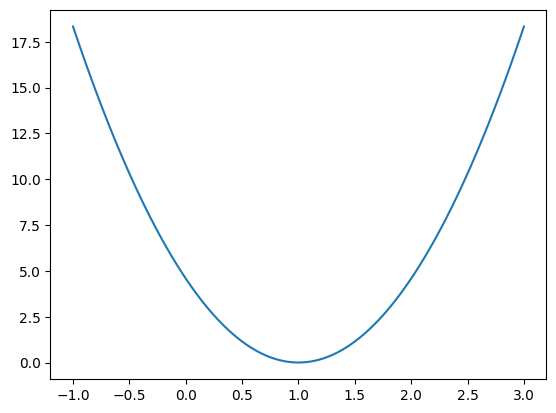

In [ ]:
x1= np.matrix([0,1,2,3,4,5])
y1= np.matrix([0,1,2,3,4,5])
theta1=np.linspace(-1,3,100)
B=VarTheta1(theta1,y1)
plt.plot(B[0], B[1])

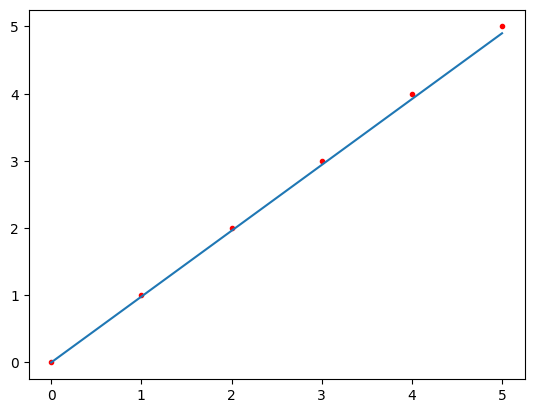

In [ ]:
plt.scatter(np.squeeze(np.asarray(x1)),np.squeeze(np.asarray(y1)), marker=".", color="red")       # La funcion np.squeeze(np.asarray()) nos vuelve una matriz en un array
plt.plot(np.squeeze(np.asarray(x1)),0+np.squeeze(np.asarray(x1))*B[0][np.argmin(B[1])])           # La funcion argmin devuelve la posicion del arreglo asociada a su minimo

In [ ]:
theta1=np.linspace(-2,2,100)
theta0=np.linspace(-2,2,100)
A=VarTheta01(theta0, theta1, y1)

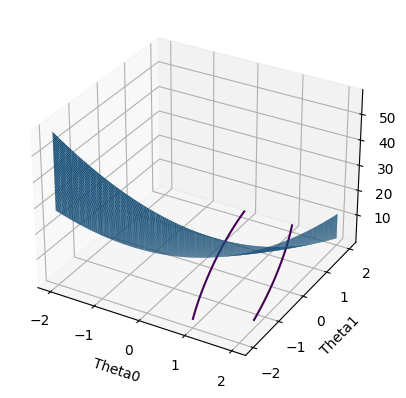

5074

In [ ]:
fig=plt.figure()
ax= fig.add_subplot(111, projection='3d')
ax.plot_surface(A[0],A[1],A[2])
ax.contour(A[0],A[1],A[2],[2])
ax.set_xlabel('Theta0')
ax.set_ylabel('Theta1')
ax.set_zlabel('Coste')
plt.show()
np.argmin(A[2])

# Gradiente Descendente


Para determinar el minimo,  a través del gradiente descendente puede ser aplicada el siguiente algoritmo:
- Proponer un número aleatorios inicial $\omega_i$
- Para descender al mínimo de la función, encontremos un  valor para el cual
el deriva de la función descenciende, asi:
\begin{equation}
\omega_{i+1} = \omega_{i} - \alpha \frac{\mathrm{d}f(\omega_i)}{\mathrm{d}\omega}
\end{equation}

donde, $\alpha$ es conocido como la tasa de aprendizaje del algoritmo.

- Evaluar $f(\omega_{i+1})$

- Iterar hasta encontrar el minimo de la función


6. Construya un algoritmo en el que emplee el gradiente descente para determinar el minimo de una función, determine el minimo con una error epsilon de  1E-4, pruebe su algoritmo para $f(x)= (x-4)^2$ y al menos 3 valores de $\alpha$


7. Para responder este punto puede consultar la siguiente  página y seguir el video[Ejemplo guia: dotcsv](https://www.youtube.com/watch?v=-_A_AAxqzCg):

Encontrar el mínimo de la siguiente función a través del metodo del gradiente descendente https://en.wikipedia.org/wiki/Gradient_descent:


\begin{equation}
F(x,y) = \sin \left( \frac{1}{2}x^2-\frac{1}{4}y^2 +3\right) \cos (2x+1-e^y)
\end{equation}

  -  Para ello realice una gráfica de la función en 3D, y un mapa de contourno de la función.
  - Determine el valor mínimo de la funcion con el metodo del gradiente descendente.




In [ ]:
df = lambda x: 2*(x-4)

def GradDes(w, a, df, n):
  A=np.zeros(n)
  A[0]=w
  i=0
  while i <n:
    if abs(df(A[i]))<1e-4:
      print('Mínimo de la función: {}'.format(A[i]))
      break
    else:
      A[i+1]=A[i]-a*df(A[i])
      i=i+1
      s=i
  print('Número de ciclos para llegar a la convergencia: {}, valores ensayados: {}'.format(s, np.trim_zeros(A)))
  return A[i]

def GradDesNoTxt(w, a, df, n):
  A=np.zeros(n)
  A[0]=w
  i=0
  while i <n:
    if abs(df(A[i]))<1e-4:
      # print('Mínimo de la función: {}'.format(A[i]))
      break
    else:
      A[i+1]=A[i]-a*df(A[i])
      i=i+1
      s=i
  # print('Número de ciclos para llegar a la convergencia: {}, valores ensayados: {}'.format(s, np.trim_zeros(A)))
  return A[i]


def GradDesAlphaVar(w,a,df,n): # emplea gradiente descendiente para un numero de alphas ingresado
  A=np.random.rand(a)
  for p in range(a):
    GradDes(w,A[p],df,n)
    print('Taza de aprendizaje utilizada: {}'.format(A[p]))

def GradDesBiDim(x0, y0, a, dfx, dfy, n):
  return print('El minimo es ({},{})'.format(GradDesNoTxt(x0,a, dfx, n),GradDesNoTxt(y0,a ,dfy, n)))

In [ ]:
GradDes(1,0.3,df,100)

Mínimo de la función: 3.9999798673408
Número de ciclos para llegar a la convergencia: 13, valores ensayados: [1.         2.8        3.52       3.808      3.9232     3.96928
 3.987712   3.9950848  3.99803392 3.99921357 3.99968543 3.99987417
 3.99994967 3.99997987]


3.9999798673408

In [ ]:
GradDesAlphaVar(1, 3, df, 1000)

Mínimo de la función: 4.000046055099247
Número de ciclos para llegar a la convergencia: 19, valores ensayados: [1.         5.67402164 3.06588385 4.52124355 3.70914234 4.16230067
 3.90943505 4.05053589 3.97180061 4.01573547 3.9912195  4.00489958
 3.997266   4.00152559 3.99914871 4.00047503 3.99973493 4.00014791
 3.99991747 4.00004606]
Taza de aprendizaje utilizada: 0.7790036073198752
Mínimo de la función: 4.000032936855862
Número de ciclos para llegar a la convergencia: 15, valores ensayados: [1.         5.40117371 3.34557074 4.30565636 3.85724078 4.06667682
 3.96885806 4.01454509 3.9932066  4.00317291 3.99851807 4.00069215
 3.99967673 4.00015099 3.99992948 4.00003294]
Taza de aprendizaje utilizada: 0.7335289517911051
Mínimo de la función: 3.999961951433319
Número de ciclos para llegar a la convergencia: 16, valores ensayados: [1.         2.51723502 3.26713601 3.63777831 3.82097012 3.91151359
 3.95626515 3.97838383 3.9893161  3.99471943 3.99739005 3.99871002
 3.99936242 3.99968487 3.999

In [ ]:
f=lambda x, y:np.sin(0.5*x**2-0.25*y**2+3)*np.cos(2*x+1-np.exp(y))

# Modelo de *machine learning*: Solución general

Un modelo general para solucionar un problema de machinine learning puede ser estructurado como sigue:


a. Eliger el modelo a emplear:
\begin{equation}
h(X,\Theta)
\end{equation}

- En el caso de una regresion lineal tenemos que $h(X,\Theta=(\theta_0, \theta_1))$:

    \begin{equation}
    h(X) = (\theta_0 + \theta_1 X)
    \end{equation}


b. Eligir la funcion de coste :
-  Metrica Ecuclidiana:
\begin{equation}
J(\Theta)=\frac{1}{2m} \sum_{i=1}^m ( h_{\theta} (X^{(i)})-y^{(i)})^2
\end{equation}
- [Lista de funciones de coste que pueden ser empleadas](https://jmlb.github.io/flashcards/2018/04/21/list_cost_functions_fo_neuralnets/)


c. Aplicar el gradiente descendente iterativamente, hasta encontrar el minimo:  

\begin{equation}
\Delta \vec{\Theta} =  - \alpha \nabla J(\Theta)
\end{equation}



- En el caso de una regresion lineal tenemos que $h(X,\Theta=(\theta_0, \theta_1))$:


\begin{equation}
\theta_0 := \theta_0 - \alpha \frac{\partial J}{\partial \theta_0}
\end{equation}

\begin{equation}
\theta_1 := \theta_1 - \alpha \frac{\partial J}{\partial \theta_1}
\end{equation}

8. Empleando los siguientes datos :

```
X = np.linspace(0, 1, 100)
y = 0.2 + 0.2*X + 0.02*np.random.random(100)
```

y las herramientas desarrolladas en los apartados anteriores,
construya un algorítmo que permita determinar una regresión lineal.

9. Compare su resultado empleando la libreria linearRegresion() de sklearn.


Hint:

Pueden comprobar la solución de la superficie con el siguiente cálculo:


\begin{equation}
J(\Theta)=\frac{1}{2m} \sum_{i=1}^m ( h_{\theta} (X^{(i)})-y^{(i)})^2
\end{equation}



Sea $\Theta^T = [\theta_0,\theta_1]$


\begin{equation}
X =
\begin{bmatrix}
1& 1 & 1 & .&.&.&1\\
x_1^{(1)}&x_1^{(2)} & x_1^{(3)} & .&.&.&x_1^{(m)}\\
\end{bmatrix}_{(n+1) \times m}
\end{equation}

Luego:

\begin{equation}
\Lambda = \Theta^T X=
\begin{bmatrix}
(\theta_0 1 + \theta_1 x_1^1)\\
(\theta_0 1 + \theta_1 x_1^2)\\
.\\
.\\
.\\
(\theta_0 1 + \theta_1 x_1^m)\\
\end{bmatrix}
\end{equation}


Sumando sobre todos los elementos de matriz se puede encontrar la función de coste $J = \mathrm{\Lambda.mean()^2}$.

In [ ]:
def hgeneral(thet, x):                            # recibe, los parametros a optimizar y los valores de x para generar la h vectorizada
  Theta=np.matrix(thet)
  for i in range ()
  Char = np.vstack([np.ones(x.shape[1]), x])
  h = Theta@Char
  return h

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd


import plotly.graph_objects as go

In [ ]:
N=100
x1=np.linspace(-1,1,N)
x2=np.linspace(-1,1,N)
X_1,X_2=np.meshgrid(x1,x2)
Y= 0.2*X_1+0.5*X_2
fig = go.Figure(go.Surface(x=X_1, y=X_2, z=Y))
fig.show()

In [ ]:
x_1=2*np.random()